In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [ ]:
path = 'drive/MyDrive/Research/data_collection/final_cleaned/final_dataset.csv'
df_imported = pd.read_csv(path)
df_imported.head()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index,fid_category,lcp_category,fcp_category,cls_category
0,810.0,1623.000353,148.574,222,95.844,810.0,1.0,964194,1582.0,0.000000,890.0,810.000000,1,1,2,1
1,791.0,1938.500000,34.172,1049,574.117,1028.5,134.0,2463660,1604.0,0.000000,1623.0,1313.142001,1,1,2,1
2,660.0,1141.000000,309.005,1814,217.650,813.0,68.0,571401,1006.0,0.000800,1440.0,999.346206,1,1,2,1
3,655.0,3584.500000,348.280,1413,1686.482,726.0,484.0,1628682,3204.0,0.028540,820.0,1023.158693,1,2,2,1
4,770.0,3351.000000,775.957,1156,1554.168,770.0,537.0,1737243,3071.0,0.033484,2881.0,1869.895174,1,2,2,2


# Exploratory Data Analysis

In this section, we will explore several methods to see if certain characteristics or features can be used to predict car price.

In [ ]:
# keeping features and target needed only for regression
df_eda = df_imported.drop(columns=[
   'fid_category',
   'lcp_category',
   'fcp_category',
   'cls_category'
])

df_eda.head()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index
0,810.0,1623.000353,148.574,222,95.844,810.0,1.0,964194,1582.0,0.000000,890.0,810.000000
1,791.0,1938.500000,34.172,1049,574.117,1028.5,134.0,2463660,1604.0,0.000000,1623.0,1313.142001
2,660.0,1141.000000,309.005,1814,217.650,813.0,68.0,571401,1006.0,0.000800,1440.0,999.346206
3,655.0,3584.500000,348.280,1413,1686.482,726.0,484.0,1628682,3204.0,0.028540,820.0,1023.158693
4,770.0,3351.000000,775.957,1156,1554.168,770.0,537.0,1737243,3071.0,0.033484,2881.0,1869.895174


### Analyzing Individual Feature Patterns using Visualization

**How to choose the right visualization method?**

When visualizing individual variables, it is important to first understand what type of variable we are dealing with. This will help us find the right visualization method for that variable.

In [ ]:
df_eda.dtypes

fcp            float64
interactive    float64
srt            float64
dom_size         int64
but            float64
fmp            float64
tbt            float64
tbw              int64
fci            float64
cls            float64
lcp            float64
ux_index       float64
dtype: object

#### Pearson correlation

In [ ]:
# pearson correlation
df_eda.corr()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index
fcp,1.000000,0.229483,0.119551,0.010910,0.052217,0.829004,0.074915,0.121782,0.219253,0.047767,0.407601,0.375029
interactive,0.229483,1.000000,0.040730,0.143546,0.839849,0.266408,0.582906,0.460006,0.936263,0.285200,0.494884,0.756577
srt,0.119551,0.040730,1.000000,0.059970,-0.006774,0.105661,0.001183,0.027694,0.030514,0.030822,0.102287,0.421066
dom_size,0.010910,0.143546,0.059970,1.000000,0.149524,0.069038,0.190784,0.060399,0.133214,0.028404,0.079610,0.098928
but,0.052217,0.839849,-0.006774,0.149524,1.000000,0.114694,0.716721,0.357378,0.879759,0.260098,0.310173,0.666730
fmp,0.829004,0.266408,0.105661,0.069038,0.114694,1.000000,0.163378,0.141018,0.265491,0.060661,0.442768,0.394131
tbt,0.074915,0.582906,0.001183,0.190784,0.716721,0.163378,1.000000,0.214650,0.649462,0.134752,0.222885,0.442445
tbw,0.121782,0.460006,0.027694,0.060399,0.357378,0.141018,0.214650,1.000000,0.396715,0.156393,0.359974,0.385499
fci,0.219253,0.936263,0.030514,0.133214,0.879759,0.265491,0.649462,0.396715,1.000000,0.282409,0.422995,0.725120
cls,0.047767,0.285200,0.030822,0.028404,0.260098,0.060661,0.134752,0.156393,0.282409,1.000000,0.188095,0.283636


### Continuous numerical variables

Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

In order to start understanding the (linear) relationship between an individual variable and the ux_index. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.

Let's see several examples of different linear relationships.

In [ ]:
def createRegressionPlotBetween(predictor, target, dataframe, scatterColor = "black", lineColor = "red"):
  sns.regplot(
      x = predictor,
      y = target,
      data = dataframe,
      scatter_kws={
        "color": scatterColor
      }, 
      line_kws={
        "color": lineColor
      }
  )
  plt.ylim(0, )

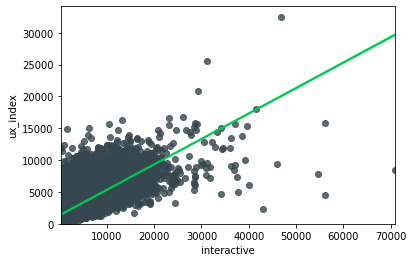

In [ ]:
createRegressionPlotBetween("interactive", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

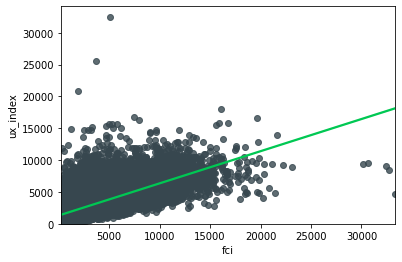

In [ ]:
createRegressionPlotBetween("fci", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

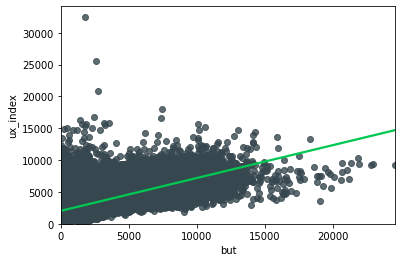

In [ ]:
createRegressionPlotBetween("but", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

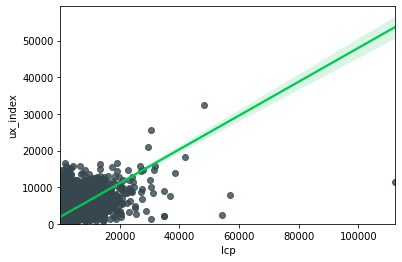

In [ ]:
createRegressionPlotBetween("lcp", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

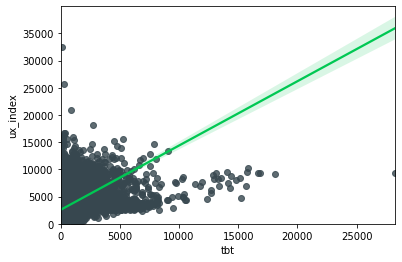

In [ ]:
createRegressionPlotBetween("tbt", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

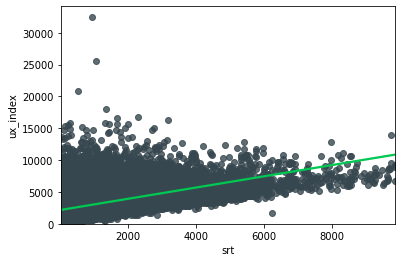

In [ ]:
createRegressionPlotBetween("srt", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

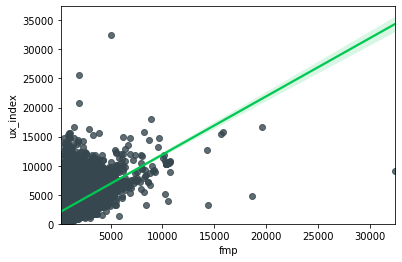

In [ ]:
createRegressionPlotBetween("fmp", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

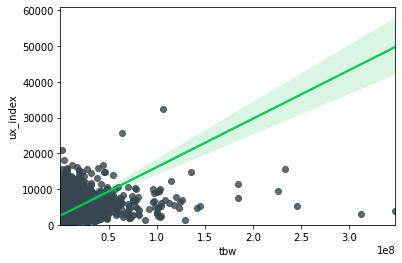

In [ ]:
createRegressionPlotBetween("tbw", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

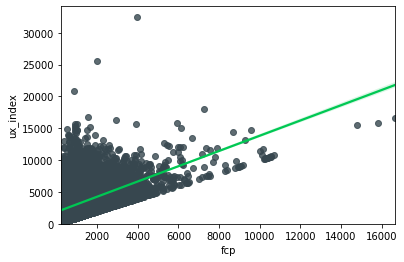

In [ ]:
createRegressionPlotBetween("fcp", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

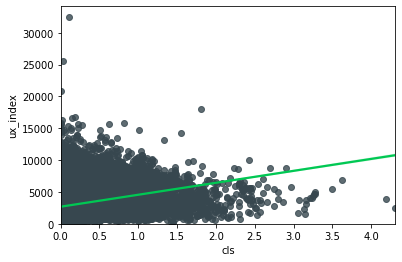

In [ ]:
createRegressionPlotBetween("cls", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

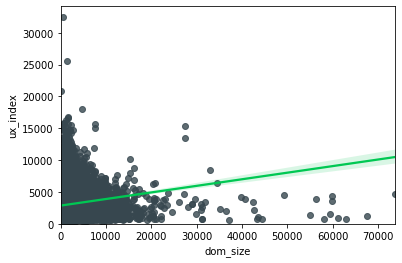

In [ ]:
createRegressionPlotBetween("dom_size", "ux_index", df_eda, scatterColor='#37474f', lineColor='#00c853')

**Explanation**

As interactive goes up, the ux_index goes up; this indicates a positive direct correlation between these two variables. **interactive** seems like a pretty good predictor of **ux_index** since the regression line is almost a perfect diagonal line.

## Descriptive Statistical Analysis

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [ ]:
df_eda.describe()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index
count,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,77848.000000,7.784800e+04,77848.000000,77848.000000,77848.000000,77848.000000
mean,949.896877,4166.749076,953.214688,1322.833920,1906.515876,1128.364308,376.275662,3.202074e+06,3384.799288,0.173483,2554.590280,3008.959377
std,569.055952,3436.686751,867.599139,1735.764199,2345.304451,712.299573,679.024364,5.151235e+06,2604.912209,0.274208,2095.029173,1813.243063
min,193.000000,193.000000,5.790000,0.000000,0.000000,193.000000,0.000000,2.530000e+02,193.000000,0.000000,194.000000,195.000000
25%,620.000000,1577.000000,359.255500,536.000000,289.348500,709.000000,17.000000,1.103931e+06,1370.000000,0.005676,1213.000000,1655.201361
50%,829.000000,3278.000000,761.573500,917.000000,1049.827500,943.500000,150.000000,2.168678e+06,2711.500000,0.063810,2055.000000,2657.775900
75%,1120.000000,5726.625000,1280.512250,1555.000000,2529.454750,1370.000000,476.000000,3.902902e+06,4681.000000,0.213731,3224.000000,3933.308755
max,16685.000000,71034.500000,9882.753000,73824.000000,24618.874000,32425.000000,28278.000000,3.476087e+08,33366.000000,4.312501,112390.000000,32516.842370


## **P-value**

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li><b>p-value is < 0.001:</b> we say there is strong evidence that the correlation is significant.</li>
    <li><b>the p-value is < 0.05:</b> there is moderate evidence that the correlation is significant.</li>
    <li><b>the p-value is < 0.1:</b> there is weak evidence that the correlation is significant.</li>
    <li><b>the p-value is > 0.1:</b> there is no evidence that the correlation is significant.</li>
</ul>

In [ ]:
from scipy import stats

In [ ]:
features = ['fcp', 'interactive', 'srt', 'dom_size', 'but', 'fmp', 'tbt', 'tbw', 'fci', 'cls', 'lcp']
p_value_score_card = []

for feature in features:
  pearson_coef, p_value = stats.pearsonr(df_eda[feature], df_eda['ux_index'])
  p_value_score_card.append({
      'Feature': feature,
      'Co-Efficient': pearson_coef,
      'P-Value': p_value,
      'Significance': p_value < 0.001
  })

p_values_dataframe = pd.DataFrame(p_value_score_card)
p_values_dataframe = p_values_dataframe.sort_values('Co-Efficient', ascending=False)
p_values_dataframe

,Feature,Co-Efficient,P-Value,Significance
1,interactive,0.756577,0.000000e+00,True
8,fci,0.725120,0.000000e+00,True
4,but,0.666730,0.000000e+00,True
10,lcp,0.533470,0.000000e+00,True
6,tbt,0.442445,0.000000e+00,True
2,srt,0.421066,0.000000e+00,True
5,fmp,0.394131,0.000000e+00,True
7,tbw,0.385499,0.000000e+00,True
0,fcp,0.375029,0.000000e+00,True
9,cls,0.283636,0.000000e+00,True


**Decision**

>According to P-value testing, the probability of the significance of correlation of every features with the target is ***high***.

<br><br><br>

# Feature Selection

Feature selection is a powerful way of reducing the complexity of a machine learning or statistical model. But feature selection must be done in the right way, or you may end up cheating yourself or others. Later we will also see if green jelly beans are truly associated with acne.
When working with machine learning, it may be a good idea to reduce the number of used features in the model. Maybe the features or measurements are costly to achieve and using fewer features in the model can ease interpretation. Additionally the model will use less computational resources and time of execution.

## **Univariate Selection / Filter Method Selection**

Statistical test can be used to select those features that have the strongest relationship with the output variable. In our case, it is ux_index.

The reason these tests are called univariate tests is that they do not look at all the features collectively. In particular, it does not take into account the interaction between features. Instead, it looks at each feature separately and determines whether there is a significant relationship between that feature and the target. So if you have 10 features, the test will be repeated for each of the 10 features, one at a time, giving you a list of 10 scores/p-values.

The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.

**Notes:** It's most likely an isolation process of the features and testing their significance with the target during isolation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

def selectKBestFeatures(dataframe, scoreFunction, specName, scoreName):
  # load the data
  X = dataframe.iloc[:, 0:11]
  y = dataframe['ux_index']

  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

  # feature selection
  f_selector = SelectKBest(score_func=scoreFunction, k='all')

  # learn relationship from training data
  f_selector.fit(X_train, y_train)

  # transform train input data
  X_train_fs = f_selector.transform(X_train)

  # transform test input data
  X_test_fs = f_selector.transform(X_test)

  df_scores = pd.DataFrame(f_selector.scores_)
  df_columns = pd.DataFrame(X.columns)

  featureScores = pd.concat([df_columns, df_scores], axis = 1)
  featureScores.columns = [specName, scoreName]

  sortedFeatureScores = featureScores.sort_values(scoreName, ascending=False)
  return sortedFeatureScores

### **F-regression univariate feature selection**

In the case of simple linear regression (regression with a single feature), this is equivalent to testing whether there is **any significant linear relationship** between that feature and the target.

It breaks our group of features into several simple linear regression models and returns the F-score of that model as the F-score for that feature.

This test only verifies whether there is a linear relationship between each feature and the target. It will fail to capture any non-linear relationship. If we wish to test a non-linear relationship, then we need to apply some feature transformation on our original features.

In [ ]:
from sklearn.feature_selection import f_regression

scoreCardFRegression = selectKBestFeatures(
    dataframe = df_eda,
    scoreFunction = f_regression,
    specName = 'FRegressionSpecification',
    scoreName = 'FRegressionScore'
)

In [ ]:
from sklearn.feature_selection import mutual_info_regression

scoreCardMututalRegression = selectKBestFeatures(
    dataframe = df_eda,
    scoreFunction = mutual_info_regression,
    specName = 'MutualInfoSpecification',
    scoreName = 'MutualInfoScore'
)

In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [ ]:
display_side_by_side(p_values_dataframe, scoreCardFRegression, scoreCardMututalRegression)

,Feature,Co-Efficient,P-Value,Significance
1,interactive,0.756577,0.000000e+00,True
8,fci,0.725120,0.000000e+00,True
4,but,0.666730,0.000000e+00,True
10,lcp,0.533470,0.000000e+00,True
6,tbt,0.442445,0.000000e+00,True
2,srt,0.421066,0.000000e+00,True
5,fmp,0.394131,0.000000e+00,True
7,tbw,0.385499,0.000000e+00,True
0,fcp,0.375029,0.000000e+00,True
9,cls,0.283636,0.000000e+00,True


<p align="left"> <u>Observation</u>: 
<b>Pearson Correlation Co-efficient</b> VS. <b>F-Regression Univariate Feature Selection</b> Vs. <b>Mutual Info (MI) Univariate</b>
</p>

- Ranking of Pearson-Coeff and F-Regression Univariate is **all the same**. So for future works, we can consider any one of them. So, we are **selecting F-Regression** Univariate Feature selection for further experiment.

- <b><u>Most significant features:</u></b> Both F-Reg and MI-Reg concludes that **Interactive** and **FCI** are the most significant predictor of ux_index.

- <b><u>Most insignificant features:</u></b> Both F-Reg and MI-Reg concludes that **CLS** and **DOM_SIZE** are the most insignificant predictor of ux_index.


# **Multiple Linear Regression**

### **Train-Test-Split**

#### **Variance**
__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

#### **R Squared**

This explains how close the data values are to the fitted regression line. The higher, the better.

#### **Random Combination of Train-Test Set**

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

def trainTestSplitLinearRegression(dataframe, trainSize, features, target, featureIndex):
  mask = np.random.rand(len(dataframe)) < trainSize

  # split training and testing set randomly
  train = dataframe[mask]
  test = dataframe[~mask]

  # initiate linear regression model
  regr = linear_model.LinearRegression()

  # extract training features and target
  X_train = np.asanyarray(train[features])
  y_train = np.asanyarray(train[target])

  # fit model
  regr.fit(X_train, y_train)

  # find co-efficient and intercept
  co_eff = regr.coef_
  intercept = regr.intercept_

  # find variance
  X_test = np.asanyarray(test[features])
  y_test = np.asanyarray(test[target])
  variance_score = regr.score(X_test, y_test)

  # prediction
  test_y_hat = regr.predict(test[features])

  # find r_squared
  r_squared = r2_score(y_test, test_y_hat)
  mae = mean_absolute_error(y_test, test_y_hat)
  rmse = math.sqrt(mean_squared_error(y_test, test_y_hat))

  return {
    'index': featureIndex,
    'features': features,
    'co_eff': co_eff,
    'intercept': intercept,
    'accuracy': variance_score*100,
    'r_squared': r_squared,
    'mae': mae,
    'rmse': rmse
  }

### **Useful feature combination**

From our previous observation, we've come to know that **cls** and **dom_size** are the most insignificant features. So, we are eliminating those features for further experiment.


In [ ]:
from itertools import combinations

features = ['fcp', 'interactive',	'srt', 'but', 'fmp',	'tbt', 'tbw', 'fci', 'lcp']
feature_combination = sum([list(map(list, combinations(features, i))) for i in range(len(features) + 1)], [])
feature_combination.remove([])
len(feature_combination)

511

In [ ]:
%load_ext google.colab.data_table
report_tts = []

for idx, comb in enumerate(feature_combination):
  result = {}
  
  result = trainTestSplitLinearRegression(
    dataframe = df_eda,
    trainSize = 0.8,
    features = comb,
    target = ['ux_index'],
    featureIndex = idx
  )
  report_tts.append(result)

reportFrameSimpleTTS = pd.DataFrame(report_tts)
reportFrameSimpleTTS

,index,features,co_eff,intercept,accuracy,r_squared,mae,rmse
0,0,[fcp],[[1.1973339899379898]],[1867.8518184158395],14.018120,0.140181,1306.849437,1692.833628
1,1,[interactive],[[0.39870444230654717]],[1347.9400486611105],57.432565,0.574326,870.515105,1189.004217
2,2,[srt],[[0.879022119031074]],[2167.2818984972027],17.429963,0.174300,1263.732582,1669.689565
3,3,[but],[[0.5150187287683567]],[2028.0182469840715],45.267440,0.452674,989.004493,1335.903082
4,4,[fmp],[[1.011629418858232]],[1867.3319594550965],14.719401,0.147194,1278.178218,1668.763032
...,...,...,...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]","[[0.2933230043828702, 0.2313534599644413, 0.76...",[108.86849302880728],76.737487,0.767375,609.684429,878.457852
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]","[[0.49386494811824794, 0.2080084857083, 0.2481...",[731.3631530332218],65.733793,0.657338,768.918410,1048.019343
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]","[[0.42447007512789076, 0.7816710993123687, 0.3...",[95.87823468535498],77.874710,0.778747,588.729527,867.129231
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]","[[0.19925533370276202, 0.7909895931133917, 0.2...",[194.37828521930624],78.896423,0.788964,563.545430,814.584413


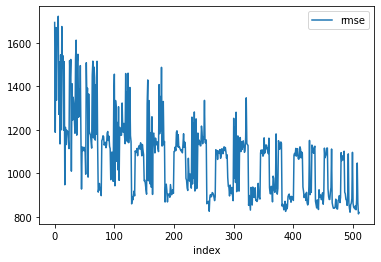

In [ ]:
# plot simple tts rsq
reportFrameSimpleTTS.plot('index', 'rmse')

# SEED TTS

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

def trainTestSplitFixedSetLinearRegression(dataframe, testSize, features, target, featureIndex):
  X_train, X_test, y_train, y_test = train_test_split(
    dataframe[features],
    dataframe[target],
    test_size=testSize,
    random_state = np.random.seed(42)
  )

  # initiate linear regression model
  regr = linear_model.LinearRegression()

  # fit model
  regr.fit(X_train, y_train)

  # find co-efficient
  co_eff = regr.coef_
  intercept = regr.intercept_

  # find variance
  variance_score = regr.score(X_test, y_test)

  # prediction
  test_y_hat = regr.predict(X_test)

  # find r_squared
  r_squared = r2_score(y_test, test_y_hat)
  mae = mean_absolute_error(y_test, test_y_hat)
  rmse = math.sqrt(mean_squared_error(y_test, test_y_hat))

  return {
    'index': featureIndex,
    'features': features,
    'co_eff': co_eff,
    'intercept': intercept,
    'accuracy': variance_score*100,
    'r_squared': r_squared,
    'mae': mae,
    'rmse': rmse
  }

In [ ]:
report_tts = []

for idx, comb in enumerate(feature_combination):
  result = {}
  
  result = trainTestSplitFixedSetLinearRegression(
    dataframe = df_eda,
    testSize = 0.2,
    features = comb,
    target = ['ux_index'],
    featureIndex = idx
  )
  report_tts.append(result)

reportFrameSeedTTS = pd.DataFrame(report_tts)
reportFrameSeedTTS

,index,features,co_eff,intercept,accuracy,r_squared,mae,rmse
0,0,[fcp],[[1.2045970962166506]],[1866.7660710455298],13.654332,0.136543,1294.784177,1669.904507
1,1,[interactive],[[0.40148208614272574]],[1336.7718391839046],56.521947,0.565219,863.790924,1184.967412
2,2,[srt],[[0.8746293759453085]],[2177.2873770415463],18.232412,0.182324,1248.741152,1625.032138
3,3,[but],[[0.5158300395910266]],[2026.1116468677833],44.727993,0.447280,988.062870,1336.053891
4,4,[fmp],[[1.0065161082947462]],[1875.1632181961868],15.459910,0.154599,1272.450717,1652.352546
...,...,...,...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]","[[0.3023607298866747, 0.25043306296481593, 0.7...",[108.8451567469424],76.843502,0.768435,596.698333,864.784312
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]","[[0.5092449796040245, 0.21290873767883825, 0.2...",[720.8029057725275],64.898617,0.648986,775.435832,1064.715244
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]","[[0.42486084285161124, 0.7763267044396308, 0.3...",[94.57241422079414],77.933666,0.779337,581.185323,844.182705
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]","[[0.20981139958302208, 0.7807105716280983, 0.2...",[201.80523127818333],78.729599,0.787296,567.285989,828.818055


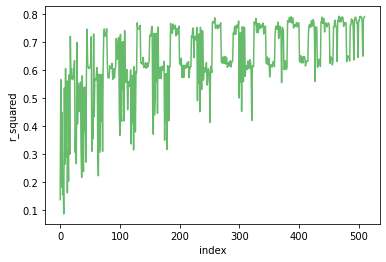

In [ ]:
sns.lineplot(data=reportFrameSeedTTS, x="index", y="r_squared", color='#66bb6a')

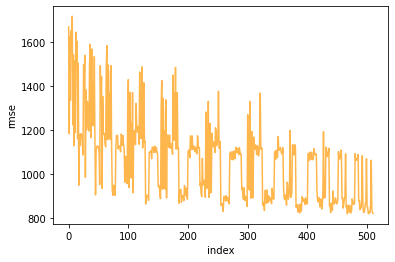

In [ ]:
sns.lineplot(data=reportFrameSeedTTS, x="index", y="rmse", color='#ffb74d')

### **Summary and Drawbacks**

#### **Best feature combination:**

- Train-Test-Split (Random Training-Test Set)
  * **Based on accuracy (79.40%):** fcp,interactive,srt,but,tbt,lcp
  * **Based on r-squared:** fcp,interactive,srt,but,fmp,tbt,tbw,fci,lcp


- Train-Test-Split (Defined Training-Test Set)
  * **Based on accuracy (79.14%):** fcp,interactive,srt,but,fmp,tbt,lcp
  * **Based on r-squared:** fcp,interactive,srt,but,fmp,tbt,lcp

Here is a summary of what we did: 

- We’ve loaded in the data 
- Split it into a training and testing sets
- Fitted a regression model to the training data
- Made predictions based on the test data. 

**Good point of this experiment:** Fair enough model for out of sample accuracy.

**Possible drawbacks:**

- There are chances that one subset of our data has low variance from a certain features or a group of features.
- This will result in overfitting.
- Chances of skewness.

### **K-Fold Cross Validation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

def kFoldCV(dataframe, features, target, fold = 5, index = 0):
  regr = LinearRegression()
  scaler = StandardScaler()

  X = scaler.fit_transform(dataframe[features])
  y = dataframe[target]

  cv_scores = cross_val_score(
    regr,
    X,
    y,
    cv = fold,
    scoring = 'r2'
  )

  cv_scores_mse = cross_val_score(
    regr,
    X,
    y,
    cv = fold,
    scoring = 'neg_mean_squared_error'
  )

  cv_scores_mse = cross_val_score(
    regr,
    X,
    y,
    cv = fold,
    scoring = 'neg_mean_absolute_error'
  )

  return {
    'index': index,
    'features': features,
    'r_squared': np.mean(cv_scores) * 100,
    'rmse': math.sqrt(np.mean(cv_scores_mse) * -1),
    'mae': np.mean(cv_scores_mse) * -1
  }

**8-Fold**

In [ ]:
report_tts = []

for idx, combination in enumerate(feature_combination):
  result = kFoldCV(
    dataframe = df_eda,
    features = combination,
    target = ['ux_index'],
    fold = 8,
    index = idx
  )
  report_tts.append(result)

reportFrame8Fold = pd.DataFrame(report_tts)
reportFrame8Fold

,index,features,r_squared,rmse,mae
0,0,[fcp],10.716871,36.070718,1301.096680
1,1,[interactive],55.307183,29.612964,876.927634
2,2,[srt],15.241069,35.437513,1255.817343
3,3,[but],42.062498,31.678775,1003.544805
4,4,[fmp],12.253181,35.792622,1281.111820
...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]",75.929928,24.587023,604.521723
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]",63.427356,28.095434,789.353430
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]",76.675564,24.268092,588.940266
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]",77.659879,24.014862,576.713618


**10 Fold**

In [ ]:
report_tts = []

for idx, combination in enumerate(feature_combination):
  result = kFoldCV(
    dataframe = df_eda,
    features = combination,
    target = ['ux_index'],
    fold = 10,
    index = idx
  )
  report_tts.append(result)

reportFrame10Fold = pd.DataFrame(report_tts)
reportFrame10Fold

,index,features,r_squared,rmse,mae
0,0,[fcp],10.537311,36.056735,1300.088171
1,1,[interactive],55.284516,29.583447,875.180339
2,2,[srt],14.953464,35.437152,1255.791724
3,3,[but],42.035725,31.649715,1001.704485
4,4,[fmp],12.083109,35.779223,1280.152799
...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]",75.894713,24.577511,604.054044
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]",63.428393,28.064579,787.620570
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]",76.612539,24.261174,588.604561
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]",77.623025,24.006720,576.322598


In [ ]:
report_tts = []

for idx, combination in enumerate(feature_combination):
  result = kFoldCV(
    dataframe = df_eda,
    features = combination,
    target = ['ux_index'],
    fold = 5,
    index = idx
  )
  report_tts.append(result)

reportFrame5Fold = pd.DataFrame(report_tts)
reportFrame5Fold

,index,features,r_squared,rmse,mae
0,0,[fcp],11.047178,36.103605,1303.470295
1,1,[interactive],55.335563,29.668848,880.240516
2,2,[srt],15.850631,35.447246,1256.507215
3,3,[but],42.184001,31.722119,1006.292809
4,4,[fmp],12.591192,35.826912,1283.567600
...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]",76.079474,24.609051,605.605409
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]",63.421751,28.160107,792.991653
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]",76.819985,24.287895,589.901851
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]",77.808355,24.033177,577.593610


In [ ]:
report_tts = []

for idx, combination in enumerate(feature_combination):
  result = kFoldCV(
    dataframe = df_eda,
    features = combination,
    target = ['ux_index'],
    fold = 3,
    index = idx
  )
  report_tts.append(result)

reportFrame3Fold = pd.DataFrame(report_tts)
reportFrame3Fold

,index,features,r_squared,rmse,mae
0,0,[fcp],11.981960,36.107768,1303.770910
1,1,[interactive],55.777776,29.659828,879.705407
2,2,[srt],16.648709,35.457311,1257.220910
3,3,[but],42.338018,31.784659,1010.264549
4,4,[fmp],13.547201,35.825838,1283.490651
...,...,...,...,...,...
506,506,"[fcp, interactive, srt, fmp, tbt, tbw, fci, lcp]",76.310046,24.605494,605.430314
507,507,"[fcp, interactive, but, fmp, tbt, tbw, fci, lcp]",63.829341,28.139304,791.820447
508,508,"[fcp, srt, but, fmp, tbt, tbw, fci, lcp]",77.005066,24.292757,590.138031
509,509,"[interactive, srt, but, fmp, tbt, tbw, fci, lcp]",78.001518,24.037983,577.824640


# Visualization

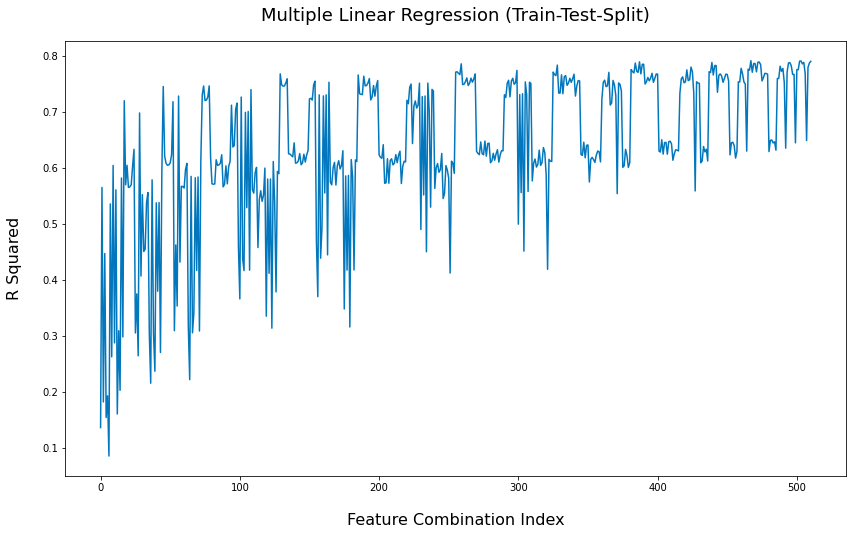

In [ ]:
plt.figure(figsize=(14, 8))
plt.title(
  'Multiple Linear Regression (Train-Test-Split)', 
  fontsize=18, 
  fontweight='light', 
  pad=20
)
plt.xlabel('Feature Combination Index', fontsize=16, labelpad=20)
plt.ylabel('R Squared', fontsize=16, labelpad=20)
sns.lineplot(data=reportFrameSeedTTS, x="index", y="r_squared", color='#0277bd')

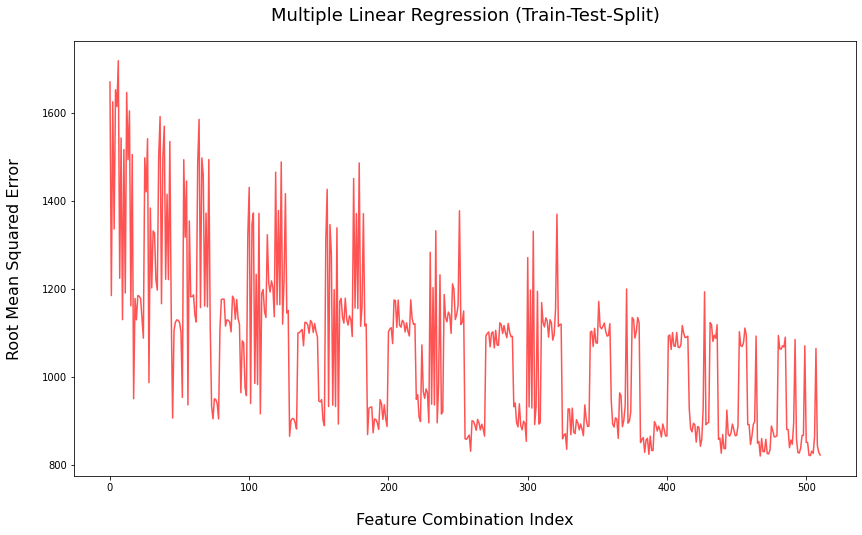

In [ ]:
plt.figure(figsize=(14, 8))
plt.title(
  'Multiple Linear Regression (Train-Test-Split)', 
  fontsize=18, 
  fontweight='light', 
  pad=20
)
plt.xlabel('Feature Combination Index', fontsize=16, labelpad=20)
plt.ylabel('Root Mean Squared Error', fontsize=16, labelpad=20)
sns.lineplot(data=reportFrameSeedTTS, x="index", y="rmse", color='#ff5252')

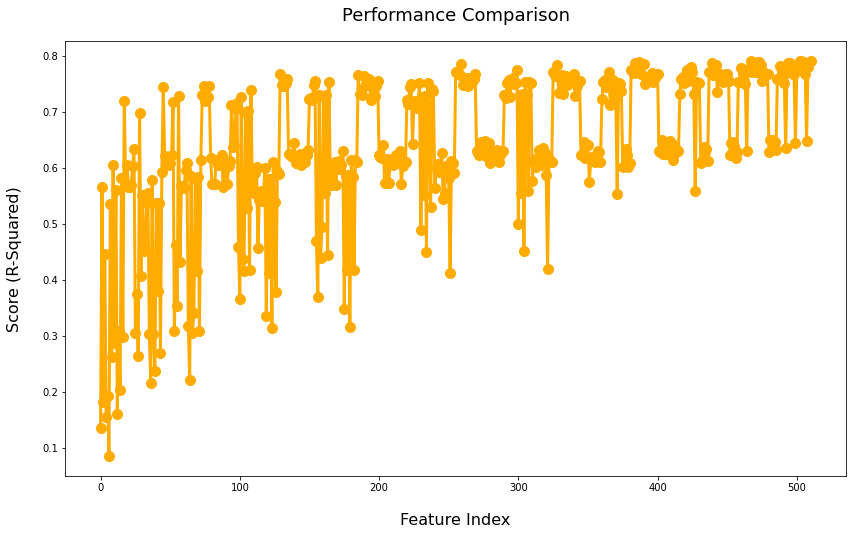

In [ ]:
plt.figure(figsize=(14, 8))
plt.title(
  'Performance Comparison', 
  fontsize=18, 
  fontweight='light', 
  pad=20
)
plt.xlabel(
  'Feature Index',
  fontsize=16,
  labelpad=20
)
plt.ylabel(
  'Score (R-Squared)',
  fontsize=16,
  labelpad=20
)
plt.plot(
  reportFrameSeedTTS['index'], 
  reportFrameSeedTTS['r_squared'], 
  color='#ffab00', 
  linewidth=3,
  marker = ".",
  markersize=20
)

plt.show()

**5-Fold Observation:**

- **Best combination of features:** fcp,interactive,srt,but,fmp,tbt,tbw,lcp
  * **Accuracy:** 78.25%

- **Second best combination:** All features
  * **Accuracy:** 78.23%

**8-Fold Observation:**

- **Best combination of features:** fcp,interactive,srt,but,fmp,tbt,tbw,lcp
  * **Accuracy:** 78.12%

- **Second best combination:** All features
  * **Accuracy:** 78.10%

**10-Fold Observation:**

- **Best combination of features:** fcp,interactive,srt,but,fmp,tbt,tbw,lcp
  * **Accuracy:** 78.07%

- **Second best combination:** All features
  * **Accuracy:** 78.06%